In [1]:
# FUTURE_DS_02 - Customer Support Ticket Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
df=pd.read_csv("customer_support_tickets.csv")

In [5]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [7]:

df['Ticket Description'] = df['Ticket Description'].fillna("")
df['Ticket Type'] = df['Ticket Type'].fillna("Unknown")
df['Ticket Priority'] = df['Ticket Priority'].fillna("Medium")
df['Ticket Status'] = df['Ticket Status'].fillna("Open")
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(0)

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

def clean_text(text):

    text = re.sub(r"{.*?}", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    return text.lower()

if 'df' in globals():
    df['cleaned_text'] = df['Ticket Description'].apply(clean_text)
else:
    print("DataFrame 'df' not found. Please ensure previous cells were executed.")


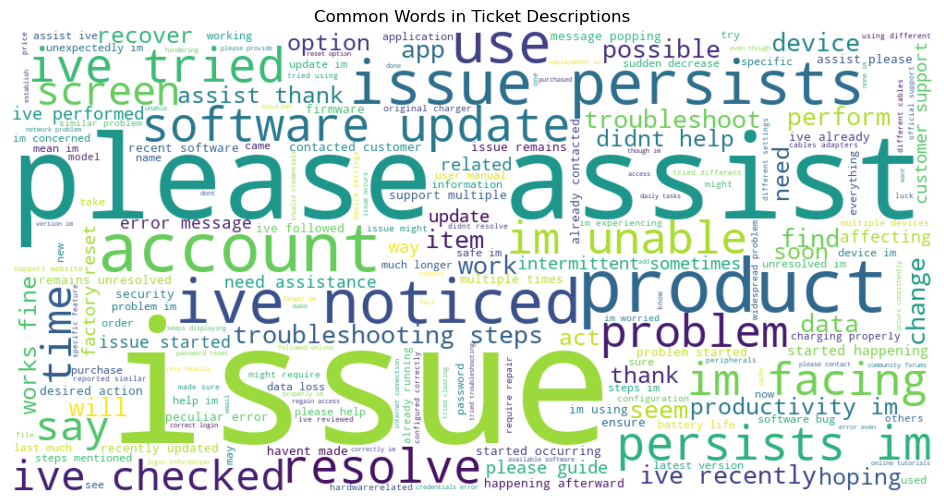

In [15]:
all_words = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Ticket Descriptions")
plt.show()

C:\Users\dolly\AppData\Local\Temp\ipykernel_16236\1838365788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Ticket Type', order=df['Ticket Type'].value_counts().head(10).index, palette="crest")


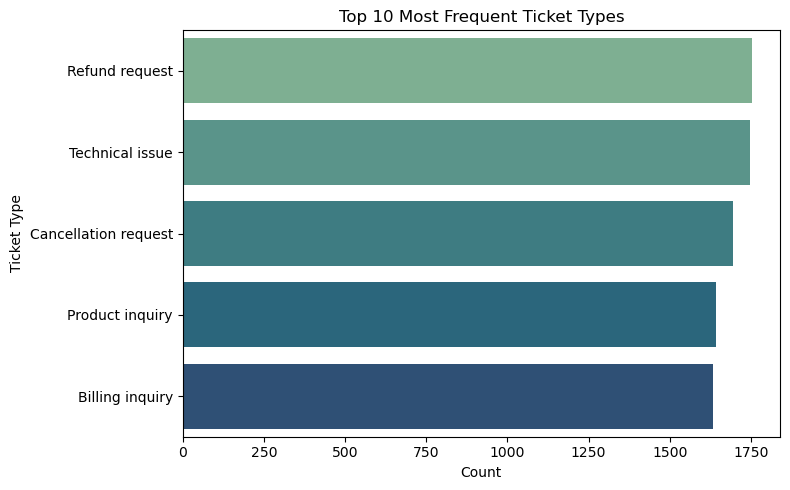

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Ticket Type', order=df['Ticket Type'].value_counts().head(10).index, palette="crest")
plt.title("Top 10 Most Frequent Ticket Types")
plt.xlabel("Count")
plt.ylabel("Ticket Type")
plt.tight_layout()
plt.show()

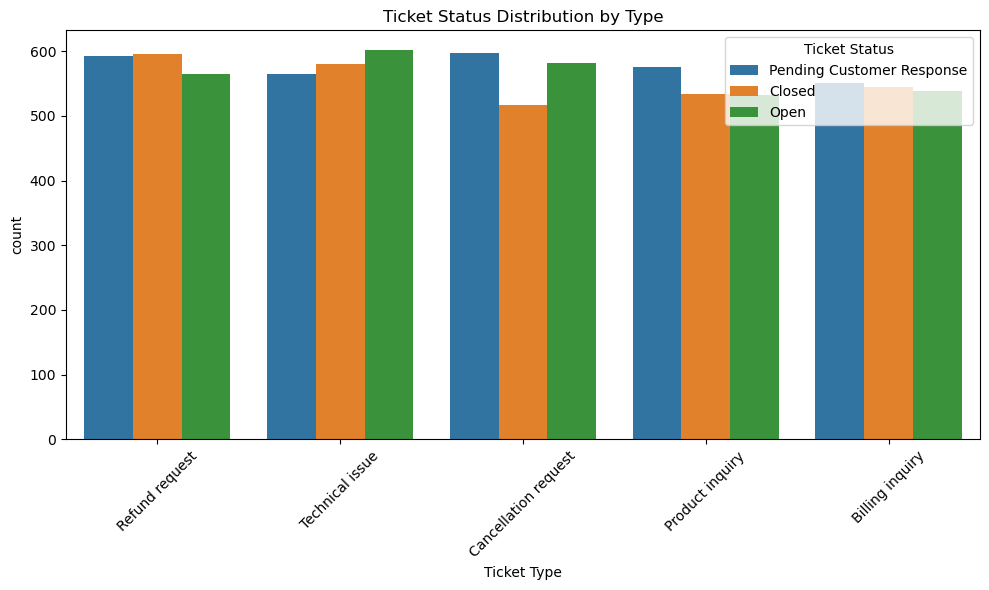

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ticket Type', hue='Ticket Status', order=df['Ticket Type'].value_counts().head(5).index)
plt.title("Ticket Status Distribution by Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:

df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Resolution Hours'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600
df['Resolution Hours'] = df['Resolution Hours'].fillna(0)

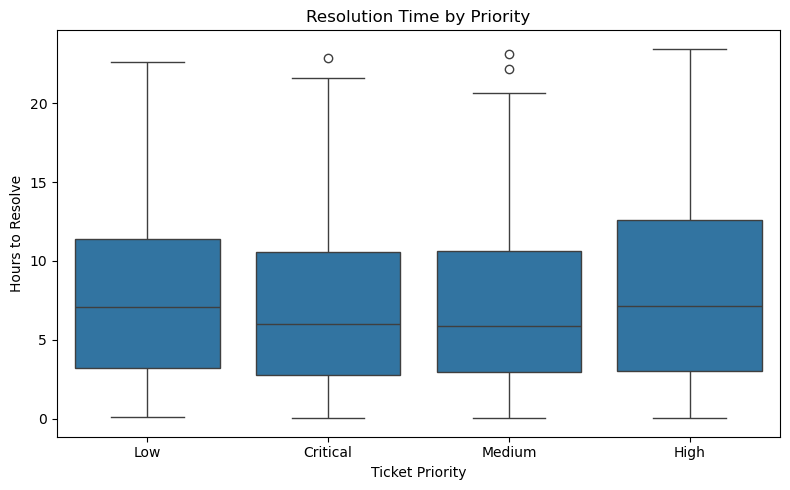

In [24]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['Resolution Hours'] > 0], x='Ticket Priority', y='Resolution Hours')
plt.title("Resolution Time by Priority")
plt.ylabel("Hours to Resolve")
plt.tight_layout()
plt.show()

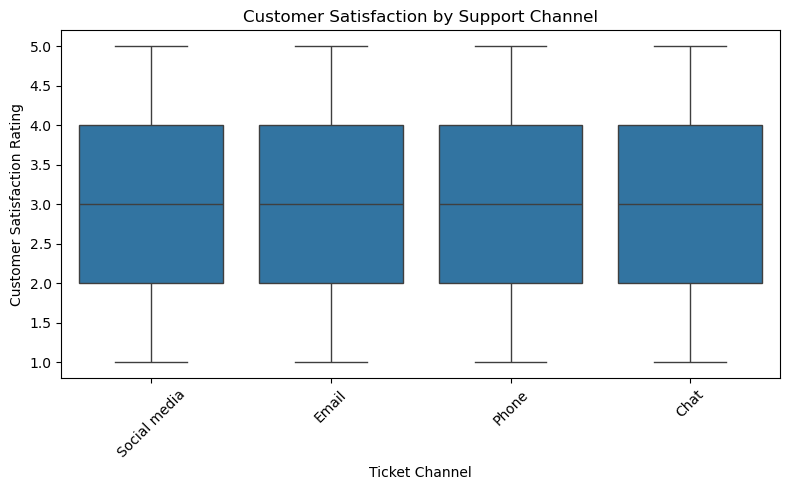

In [26]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['Customer Satisfaction Rating'] > 0], x='Ticket Channel', y='Customer Satisfaction Rating')
plt.title("Customer Satisfaction by Support Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:

df.to_csv("processed_customer_tickets.csv", index=False)
